# EDA 

In [50]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn
import requests
import json
import datetime

# Read data

## Police Complaints

In [251]:
def append_to_df(df, path, xlsx=False, sep=','):
    df=pd.concat([
        df, 
        pd.read_excel(path, engine='openpyxl') if xlsx else pd.read_csv(path, sep=sep, encoding='latin-1')
    ])
    
    return df

def read_complaints():
    df_complaints=pd.read_csv('./Data/police_complaints/OpenDataContact_Gennaio_Giugno_2016.csv', sep=',')#[['Date', 'HomeTeam', 'AwayTeam']]
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Gennaio_Giugno_2016.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/Contact_Gennaio_Giugno_2017.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Luglio_Dicembre_2017.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Gennaio_Giugno_2018.xlsx', xlsx=True)
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Gennaio_Giugno_2019.csv')
    df_complaints=append_to_df(df_complaints, './Data/police_complaints/OpenDataContact_Luglio_Dicembre_2019.csv', sep=';')

    df_complaints["Data"]=pd.to_datetime(df_complaints['Data'], utc=True).astype('datetime64[ns]')
    df_complaints["Ora"]=pd.to_datetime(df_complaints['Ora'].astype(str), utc=True, format='%H.%M').values.astype('<M8[h]')
    return df_complaints.sort_values("Data", ascending=True) 

df_complaints=read_complaints()
df_complaints

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
382,Convivenza Civile,Disturbi Cani,2.0,BALTIMORA/(VIA) ...,NaN,2016-01-01,1900-01-01 18:00:00
796,Qualit� Urbana,Decoro e degrado urbano,3.0,COAZZE/(VIA) ...,NaN,2016-01-01,1900-01-01 17:00:00
382,Convivenza Civile,Disturbi Cani,2.0,BALTIMORA/(VIA) ...,NaN,2016-01-01,1900-01-01 18:00:00
796,Qualitï¿½ Urbana,Decoro e degrado urbano,3.0,COAZZE/(VIA) ...,NaN,2016-01-01,1900-01-01 17:00:00
49,Convivenza Civile,Aggregazioni giovanili,5.0,VAL DELLA TORRE/(VIA) ...,Area Verde,2016-01-02,NaT
...,...,...,...,...,...,...,...
189,Convivenza Civile,Altro,7.0,GIULIO CESARE/(CORSO) ...,NaN,2019-12-30,1900-01-01 09:00:00
374,Convivenza Civile,Disturbi da locali,8.0,SALUZZO/(LARGO) ...,NaN,2019-12-30,1900-01-01 12:00:00
832,Qualità Urbana,Decoro e degrado urbano,9.0,GALIMBERTI/TANCREDI (PIAZZA) ...,NaN,2019-12-30,1900-01-01 12:00:00
190,Convivenza Civile,Altro,8.0,MONCALIERI/(CORSO) ...,NaN,2019-12-31,1900-01-01 09:00:00


In [252]:
df_complaints=df_complaints[df_complaints["Sottocategoria Criminologica"]=="Rumori molesti"]
df_complaints

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
560,Convivenza Civile,Rumori molesti,1.0,MISERICORDIA/(VIA) ...,NaN,2016-01-03,NaT
560,Convivenza Civile,Rumori molesti,1.0,MISERICORDIA/(VIA) ...,NaN,2016-01-03,NaT
540,Convivenza Civile,Rumori molesti,9.0,NIZZA/(VIA) ...,NaN,2016-01-15,NaT
540,Convivenza Civile,Rumori molesti,9.0,NIZZA/(VIA) ...,NaN,2016-01-15,NaT
541,Convivenza Civile,Rumori molesti,7.0,CIGNA/FRANCESCO (LARGO) ...,NaN,2016-01-16,NaT
...,...,...,...,...,...,...,...
437,Convivenza Civile,Rumori molesti,7.0,REGGIO/(VIA) ...,NaN,2019-11-28,NaT
447,Convivenza Civile,Rumori molesti,4.0,BAGETTI/PIETRO (VIA) ...,NaN,2019-12-02,NaT
413,Convivenza Civile,Rumori molesti,8.0,S. ANSELMO/(VIA) ...,NaN,2019-12-09,1900-01-01 07:00:00
441,Convivenza Civile,Rumori molesti,3.0,COL DI LANA/(VIA) ...,NaN,2019-12-13,1900-01-01 12:00:00


### Aggregate complaints per day

In [223]:
df_complaints_day=df_complaints.groupby(pd.Grouper(key="Data", freq="D", origin='2016-01-01')).size().reset_index(name='counts').sort_values("Data")
df_complaints_day

,Data,counts
0,2016-01-03,2
1,2016-01-04,0
2,2016-01-05,0
3,2016-01-06,0
4,2016-01-07,0
...,...,...
1436,2019-12-09,1
1437,2019-12-10,0
1438,2019-12-11,0
1439,2019-12-12,0


### Aggregate complaints per hour

In [253]:
df_complaints_hour=df_complaints.groupby(pd.Grouper(key="Ora", freq="H")).size().reset_index(name='counts').sort_values("Ora")
df_complaints_hour

,Ora,counts
0,1900-01-01 07:00:00,5
1,1900-01-01 08:00:00,7
2,1900-01-01 09:00:00,15
3,1900-01-01 10:00:00,19
4,1900-01-01 11:00:00,19
5,1900-01-01 12:00:00,14
6,1900-01-01 13:00:00,8
7,1900-01-01 14:00:00,7
8,1900-01-01 15:00:00,2


## Weather from IoT sensors

In [202]:
def obj_col_to_float(df, col):
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col]=df[col].astype(float)
    
    return df

In [205]:
# C1 = TORINO GIARDINI REALI, Rain level about 10 minutes - Millimeters;;;
df_rain = pd.read_csv('./Data/weather/weather_rain.csv', sep=';')[['Date', 'Hour', 'C1']].rename(columns={'C1':'rain_mm'})
# C1 = TORINO GIARDINI REALI, Wind speed (scalar) - Meters per second;;
df_wind_speed = pd.read_csv('./Data/weather/weather_wind_speed.csv', sep=';')[['Date', 'Hour', 'C1']].rename(columns={'C1':'wind_speed_ms'})
# C1 = TORINO GIARDINI REALI, Wind speed (gust) - Meters per second;;
df_wind_gust = pd.read_csv('./Data/weather/weather_wind_gust.csv', sep=';')[['Date', 'Hour', 'C1']].rename(columns={'C1':'wind_gust_ms'})
# C1 = TORINO GIARDINI REALI, Snow depth - Meters;;;
# C2 = TORINO GIARDINI REALI, Air temperature - Degrees Celsius;;;
df_snow_temperature = pd.read_csv('./Data/weather/weather_snow_temperature.csv', sep=';')[['Date', 'Hour', 'C1', 'C2']].rename(columns={'C1':'snow_m', 'C2': 'temperature_c'})


df_weather=pd.merge(df_rain, df_wind_speed, left_on=["Date", "Hour"], right_on=["Date", "Hour"], how='outer')
df_weather=pd.merge(df_weather, df_wind_gust, left_on=["Date", "Hour"], right_on=["Date", "Hour"], how='outer')
df_weather=pd.merge(df_weather, df_snow_temperature, left_on=["Date", "Hour"], right_on=["Date", "Hour"], how='outer')

df_weather["Date"]=pd.to_datetime(df_weather['Date'], utc=True).astype('datetime64[ns]')
df_weather=obj_col_to_float(df_weather, "rain_mm")
df_weather=obj_col_to_float(df_weather, "wind_speed_ms")
df_weather=obj_col_to_float(df_weather, "wind_gust_ms")
df_weather=obj_col_to_float(df_weather, "snow_m")
df_weather=obj_col_to_float(df_weather, "temperature_c")

df_weather

/home/fabio/miniconda3/envs/WDL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Hour,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
0,2016-01-06,00:00,NaN,NaN,NaN,NaN,NaN
1,2016-01-06,00:10,0.0,0.6,NaN,NaN,NaN
2,2016-01-06,00:20,0.0,0.7,NaN,NaN,NaN
3,2016-01-06,00:30,0.0,0.8,NaN,-0.02,14.2
4,2016-01-06,00:40,0.0,0.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...
266107,2021-06-22,23:10,0.0,NaN,NaN,NaN,NaN
266108,2021-06-22,23:20,0.0,NaN,NaN,NaN,NaN
266109,2021-06-22,23:30,0.0,NaN,NaN,0.35,16.9
266110,2021-06-22,23:40,0.4,NaN,NaN,NaN,NaN


### Generate aggregated values per day

In [207]:
df_weather_day=df_weather.groupby("Date", dropna=True).agg({
    'rain_mm': 'mean', 
    'wind_speed_ms': 'mean',
    'wind_gust_ms': 'mean',
    'snow_m': 'mean',
    'temperature_c': 'mean'
}) 

df_weather_day

,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
Date,,,,,
2016-01-06,0.000000,0.731469,2.126087,0.017872,17.736170
2016-01-07,0.000000,0.260839,1.404348,0.031489,24.648936
2016-01-08,0.001399,0.470629,2.226087,-0.005106,24.785106
2016-01-09,0.000000,0.481119,1.565217,-0.006809,24.536170
2016-01-10,0.000000,0.467133,1.652174,0.025532,16.946809
...,...,...,...,...,...
2021-12-02,0.000000,NaN,NaN,-0.000213,3.472340
2021-12-03,0.000000,NaN,NaN,-0.026596,10.127660
2021-12-04,0.012587,NaN,NaN,0.018936,10.714894


### Generate aggregated values per hour

In [ ]:
df_weather_day=df_weather.groupby("Hour", dropna=True).agg({
    'rain_mm': 'mean', 
    'wind_speed_ms': 'mean',
    'wind_gust_ms': 'mean',
    'snow_m': 'mean',
    'temperature_c': 'mean'
}) 

df_weather_day

## Holidays

In [14]:
df_holidays=None 

for year in range (2016, 2022): 
    with open('./Data/holidays/{}.json'.format(year)) as f:
       data = json.load(f)

    curr = pd.json_normalize(data, ["response", 'holidays'])
    if df_holidays is None:
        df_holidays = curr
    else:
        df_holidays=pd.concat([df_holidays, curr])
  
df_holidays['date.iso'] = pd.to_datetime(df_holidays['date.iso'], utc=True).astype('datetime64[ns]')
print(df_holidays.shape)

df_holidays=df_holidays[["name", "description", "type", "date.iso", "locations", "states"]]
df_holidays.head()
#df_holidays[df_holidays['date.iso'] > datetime.datetime(year=2017,month=1,day=1)]

(144, 19)


,name,description,type,date.iso,locations,states
0,New Year's Day,New Year’s Day is celebrated in Italy on Janua...,[National holiday],2016-01-01 00:00:00,All,All
1,Epiphany,Epiphany is a national holiday in Italy celebr...,[National holiday],2016-01-06 00:00:00,All,All
2,March Equinox,March Equinox in Italy (Rome),[Season],2016-03-20 04:30:04,All,All
3,Good Friday,Good Friday is part of the Holy Week of Easter...,[Observance],2016-03-25 00:00:00,All,All
4,Easter Sunday,Easter Day is a public holiday that is celebra...,[Observance],2016-03-27 00:00:00,All,All


## Football games

In [75]:
df_football=None 

for year in range (2015, 2021): 
    curr = pd.read_csv('./Data/football/series_a/{}.csv'.format(year), sep=',')[['Date', 'HomeTeam', 'AwayTeam']]
    if df_football is None:
        df_football = curr
    else:
        df_football=pd.concat([df_football, curr])

df_football["Date"]=pd.to_datetime(df_football['Date'], utc=True).astype('datetime64[ns]')

# Filter by games related at fc torino
df_football=df_football[df_football['HomeTeam']=='Torino']
df_football

,Date,HomeTeam,AwayTeam
18,2015-08-30,Torino,Fiorentina
39,2015-09-20,Torino,Sampdoria
56,2015-09-27,Torino,Palermo
71,2015-10-17,Torino,Milan
97,2015-10-28,Torino,Genoa
...,...,...,...
307,2021-04-18,Torino,Roma
327,2021-04-26,Torino,Napoli
338,2021-03-05,Torino,Parma
357,2021-12-05,Torino,Milan


# Correlation Analysis

In [156]:
def plot_complaints_corr(df, col):
    fg = seaborn.FacetGrid(data=df, hue=col, hue_order=[True, False], aspect=2, size=7 )
    fg.map(plt.scatter, 'Data', 'counts').add_legend()
    return fg

## Weekends

In [155]:
# Assign bool var
df_complaints_day['IsWeekend'] = df_complaints_day.apply(lambda row: True if row.Data.weekday() > 4 else False, axis=1)

# project values
df_weekend=df_complaints_day[["Data", "counts", "IsWeekend"]]
df_weekend

,Data,counts,IsWeekend
0,2016-01-03,2,True
1,2016-01-04,0,False
2,2016-01-05,0,False
3,2016-01-06,0,False
4,2016-01-07,0,False
...,...,...,...
1436,2019-12-09,1,False
1437,2019-12-10,0,False
1438,2019-12-11,0,False
1439,2019-12-12,0,False


/home/fabio/miniconda3/envs/WDL/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


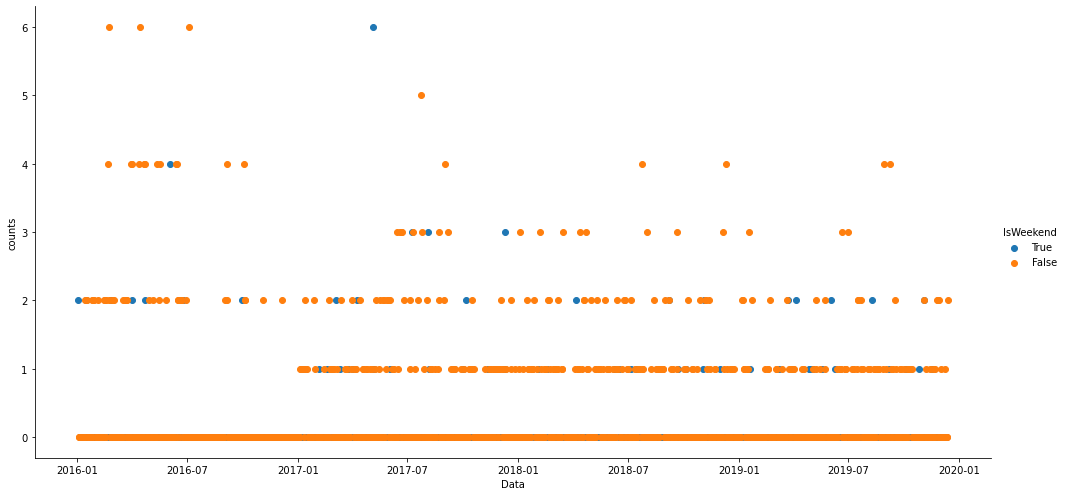

In [157]:
plot_complaints_corr(df_weekend, "IsWeekend")

## Holidays

In [147]:
# Merge dfs
df_merged=pd.merge(df_complaints_day, df_holidays, left_on=["Data"], right_on=["date.iso"], how='outer')
df_merged=df_merged[df_merged["Data"].notnull()]

# Assign bool var
df_merged['IsHoliday'] = df_merged.apply(lambda row: False if pd.isnull(row['type'])  else True, axis=1)

# project values
df_merged=df_merged[["Data", "counts", "IsHoliday"]]
df_merged

,Data,counts,IsHoliday
0,2016-01-03,2.0,False
1,2016-01-04,0.0,False
2,2016-01-05,0.0,False
3,2016-01-06,0.0,True
4,2016-01-07,0.0,False
...,...,...,...
1444,2019-12-09,1.0,False
1445,2019-12-10,0.0,False
1446,2019-12-11,0.0,False
1447,2019-12-12,0.0,False


/home/fabio/miniconda3/envs/WDL/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


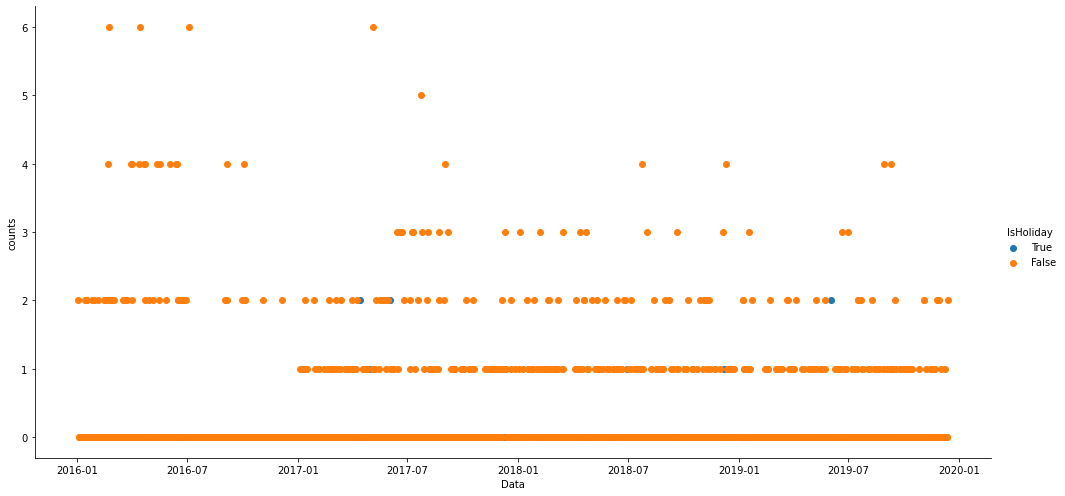

In [158]:

#df_merged.plot.scatter(x='Data', y='counts', figsize=(16, 9), title="Noise level complaints per day over time")
#sns.pairplot(df_merged)

plot_complaints_corr(df_merged, "IsHoliday")

## Football

In [159]:
# Merge dfs
df_merged=pd.merge(df_complaints_day, df_football, left_on=["Data"], right_on=["Date"], how='outer')
df_merged=df_merged[df_merged["Data"].notnull()]

# Assign bool var
df_merged['IsFootball'] = df_merged.apply(lambda row: False if pd.isnull(row['HomeTeam'])  else True, axis=1)

# project values
df_merged=df_merged[["Data", "counts", "IsFootball"]]
df_merged

,Data,counts,IsFootball
0,2016-01-03,2.0,False
1,2016-01-04,0.0,False
2,2016-01-05,0.0,False
3,2016-01-06,0.0,False
4,2016-01-07,0.0,False
...,...,...,...
1436,2019-12-09,1.0,False
1437,2019-12-10,0.0,False
1438,2019-12-11,0.0,False
1439,2019-12-12,0.0,False


/home/fabio/miniconda3/envs/WDL/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


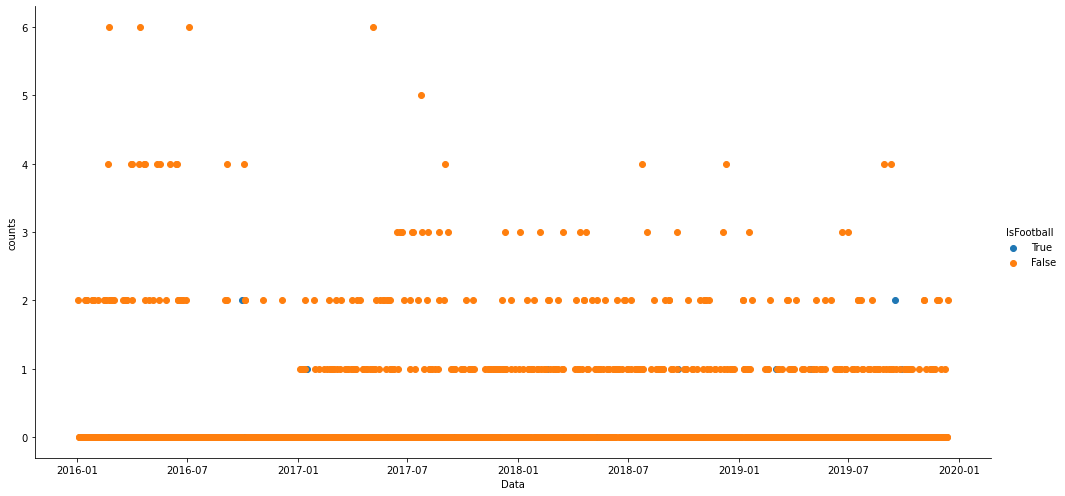

In [160]:
plot_complaints_corr(df_merged, "IsFootball")

## Weather

In [208]:
# Merge dfs
df_merged=pd.merge(df_complaints_day, df_weather_day, left_on=["Data"], right_on=["Date"], how='outer')
df_merged=df_merged[df_merged["Data"].notnull()]

df_merged

,Data,counts,IsWeekend,rain_mm,wind_speed_ms,wind_gust_ms,snow_m,temperature_c
0,2016-01-03,2.0,True,NaN,NaN,NaN,NaN,NaN
1,2016-01-04,0.0,False,NaN,NaN,NaN,NaN,NaN
2,2016-01-05,0.0,False,NaN,NaN,NaN,NaN,NaN
3,2016-01-06,0.0,False,0.000000,0.731469,2.126087,0.017872,17.736170
4,2016-01-07,0.0,False,0.000000,0.260839,1.404348,0.031489,24.648936
...,...,...,...,...,...,...,...,...
1436,2019-12-09,1.0,False,0.000000,NaN,NaN,0.087021,20.344681
1437,2019-12-10,0.0,False,0.000000,NaN,NaN,0.022222,13.648936
1438,2019-12-11,0.0,False,0.001399,NaN,NaN,0.010000,7.517021
1439,2019-12-12,0.0,False,0.000000,NaN,NaN,-0.007447,2.393617


### Overall correlation

<AxesSubplot:>

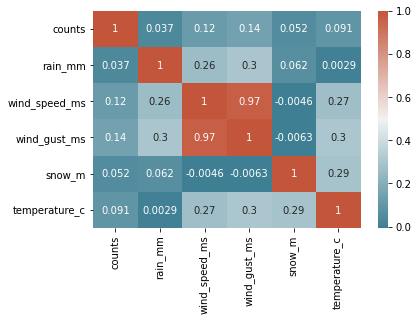

In [217]:
# calculate correlation matrix
corr = df_merged.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Wind vs Noise Complaints

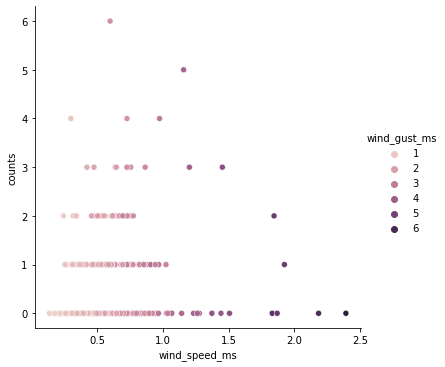

In [219]:
sns.relplot(x="wind_speed_ms", y="counts", hue="wind_gust_ms", data=df_merged);

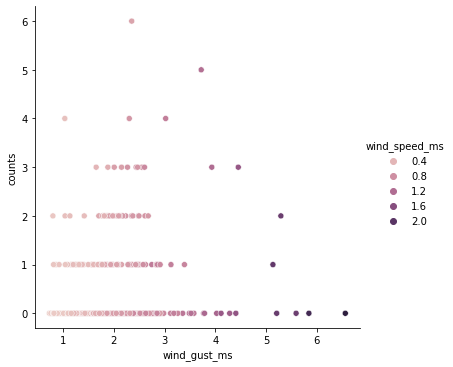

In [218]:
sns.relplot(x="wind_gust_ms", y="counts", hue="wind_speed_ms", data=df_merged);

### Temperature/Snow vs Noise Complaints

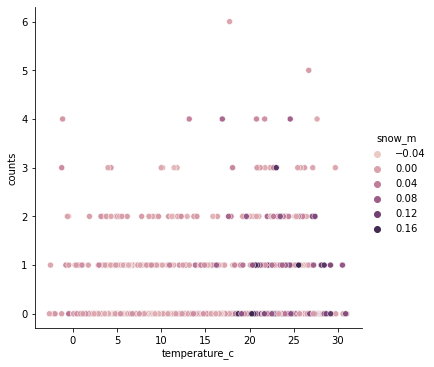

In [213]:
sns.relplot(x="temperature_c", y="counts", hue="snow_m", data=df_merged);

### Rain vs Noise Complaints

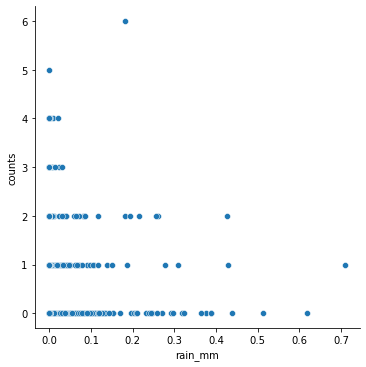

In [215]:
sns.relplot(x="rain_mm", y="counts", data=df_merged);

## Open Weather Analysis

In [25]:
conversion_dic= {
    "Porto": "Porto",
    "Aveiro": "Aveiro",
    "Lisboa": "Lisbon",
    "Setúbal": "Setubal"
}

def get_lat_lon(district_name, city_name):
    print("Retrieving Lat and Long of {0} ({1})...".format(city_name, district_name))

    # If no city name is available then use district instead
    if city_name in conversion_dic:
        city_name=conversion_dic[city_name]
    
    url = "http://api.openweathermap.org/geo/1.0/direct?q=" + city_name + "&appid=155b4d6acbf49ae8044c54f654953578"

    request_json=requests.get(url).json()
    if len(request_json)==0:
        return get_history(district_name, district_name)
        
    return (request_json[0]["lat"], request_json[0]["lon"])


def get_air_polution(lat, lon, metric):
    print("Retrieving {0} ({1}) air polution...".format(lat, lon))
    
    url = "http://api.openweathermap.org/data/2.5/air_pollution?lat={0}&lon={1}&appid=155b4d6acbf49ae8044c54f654953578".format(lat, lon)

    request_json=requests.get(url).json()
        
    if metric==None:
        return request_json["list"][0]["main"]["aqi"]
    else:
        return request_json["list"][0]["components"][metric]
    
def get_history(district_name, city_name):
    print("Retrieving {0} ({1}) history...".format(city_name, district_name))

    # If no city name is available then use district instead
    if city_name in conversion_dic:
        city_name=conversion_dic[city_name]
    
    url = "http://history.openweathermap.org/data/2.5/aggregated/year?q=" + city_name + ",PT&appid=" + "155b4d6acbf49ae8044c54f654953578" \
                + "&start=2019-04-01" \
                + "&end=2020-03-31" \

    request_json=requests.get(url).json()
    if "result" not in request_json:
        return get_history(district_name, district_name)
        
    return pd.json_normalize(request_json["result"])

def get_agg_metric(district, city, col, agg_metric):
    df=get_history(district, city)
    return df.agg({col: agg_metric})[0] 

In [26]:
aveiro_weather=get_history("Aveiro", "Aveiro")
print(aveiro_weather.columns)
aveiro_weather.head()

Retrieving Aveiro (Aveiro) history...


KeyboardInterrupt: 

## Weather City Averages

## Aveiro

In [ ]:
print("Temp Year Mean >> " + str(get_agg_metric("Aveiro", "Aveiro", "temp.mean", "mean")))
print("Precipitation Year Mean >> " + str(get_agg_metric("Aveiro", "Aveiro", "precipitation.mean", "mean")))

## Porto

In [ ]:
print("Temp Year Mean >> " + str(get_agg_metric("Porto", "Porto", "temp.mean", "mean")))
print("Precipitation Year Mean >> " + str(get_agg_metric("Porto", "Porto", "precipitation.mean", "mean")))

## Lisbon

In [ ]:
print("Temp Year Mean >> " + str(get_agg_metric("Lisboa", "Lisboa", "temp.mean", "mean")))
print("Precipitation Year Mean >> " + str(get_agg_metric("Lisboa", "Lisboa", "precipitation.mean", "mean")))

## Join Weather Cols

In [68]:
def apply_func(district_name, city_name, metric):
    lat_lon = get_lat_lon(district_name, city_name)
    return get_air_polution(lat_lon[0], lat_lon[1], metric)

#linksRoutesPerOrigin['AvgYearTemp'] = linksRoutesPerOrigin.apply(lambda row: get_agg_metric(row.name[0], row.name[1], "temp.mean", "mean"), axis=1)
#linksRoutesPerOrigin['AvgYearPrecipitation'] = linksRoutesPerOrigin.apply(lambda row: get_agg_metric(row.name[0], row.name[1], "precipitation.mean", "mean"), axis=1)
#linksRoutesPerOrigin['CO2Concentration'] = linksRoutesPerOrigin.apply(lambda row: apply_func(row.name[0], row.name[1], "co"), axis=1)
#linksRoutesPerOrigin['pm2_5Concentration'] = linksRoutesPerOrigin.apply(lambda row: apply_func(row.name[0], row.name[1], "pm2_5"), axis=1)
#linksRoutesPerOrigin['pm10Concentration'] = linksRoutesPerOrigin.apply(lambda row: apply_func(row.name[0], row.name[1], "pm10"), axis=1)

#linksRoutesPerOrigin['AirQuality'] = linksRoutesPerOrigin.apply(lambda row: apply_func(row.name[0], row.name[1], None), axis=1)

#linksRoutesPerOrigin.join(dfLPP, linksRoutesPerOrigin.name.County_of_Origin==dfLPP.local)

,NumberOfLinks,NumberOfRoutes,AvgDailyPopulation,local,2017
0,32,16,272.407024,Santa Maria da Feira,84.8
1,3832,132,1176.641628,Lisboa,219.6
2,1255,120,715.200512,Odivelas,89.3
3,2824,152,394.144009,Oeiras,156.5
4,1929,100,364.993711,Vila Franca de Xira,98.4
5,1226,107,351.236967,Sintra,94.1
6,472,98,285.334270,Cascais,122.1
7,613,92,155.706508,Amadora,100.6
8,283,81,144.367737,Mafra,96.3
9,141,51,141.271239,Loures,92.3
